In [ ]:
# Run this cell and select the kaggle.json file downloaded from the kaggle account settings page.
from google.colab import files
files.upload()

In [2]:
# next install the kaggle api client.
!pip install -q kaggle

In [3]:
# the kaggle api client expects this file to be in /.kaggle, so more it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# this permissions change avoids a warning on kagglr tools startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# creating dir and changing the current working dir
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [5]:
# searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          69425        894  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           9091        237  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            329          8  0.75             
bhavinmoriya/german-traffic-sign-recognition-bench

In [6]:
# downloading dataset and comimg out of dir
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

100% 612M/612M [00:41<00:00, 15.5MB/s]
100% 612M/612M [00:41<00:00, 15.4MB/s]
/content


In [7]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [8]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf

from matplotlib.image import imread
from PIL import Image
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

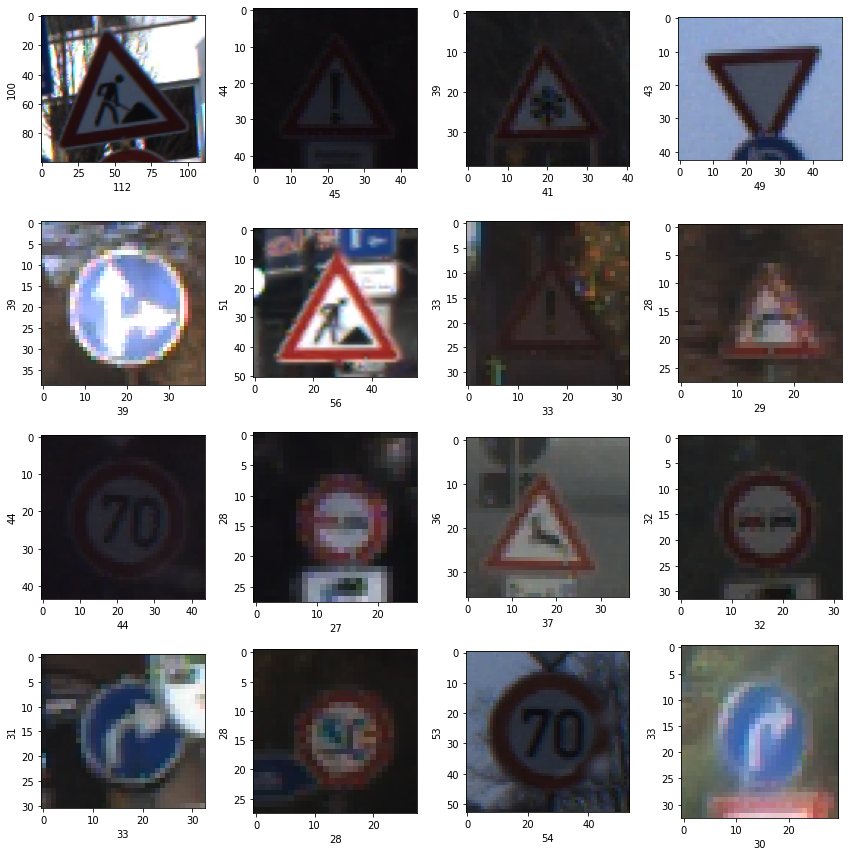

In [10]:
# PLotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = 'traffic_sign_dataset/Test'
for i in range(1, 17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
  plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [11]:
# as size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0, 43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [12]:
# printing mean dimension of images
print('Dimension 1 Mean: ', np.mean(dim1), 'Dimension 2 Mean: ', np.mean(dim2))

Dimension 1 Mean:  50.328929582493814 Dimension 2 Mean:  50.83587951745773


In [13]:
# Now we will reshape images to (50,50)
images = []
label_id = []

for i in range(43):
  labels = 'traffic_sign_dataset/Train'+ '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [14]:
# converting images into numpy array
images = np.array(images)
# the pixel value of each image range between 0 and 255
# dividing each image by3 255 will scale the valued between 0 and 1.
# this is also known as normalization.
images = images / 255


In [15]:
# Now , we will convert all the images into numpy array and normalize them.
label_id = np.array(label_id)
label_id.shape

(39209,)

In [16]:
# storing the labeld id into numpy array and printing the shape.
images.shape

(39209, 50, 50, 3)

In [17]:
# visualize the number of classes counts
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [18]:
# splitting the data 
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=42)

In [19]:
# keras has built-in function for one-hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [22]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [23]:
# defining the model architecture. in this we will define all the layers with their input shape kernel size, activation, etc
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 25, 25, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 64)       

In [24]:
# compiling the model using metrics, optimizer and loss as required and printing out the summary of the model.
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), verbose=2)


Epoch 1/10
246/246 - 13s - loss: 2.5311 - accuracy: 0.3051 - val_loss: 1.3024 - val_accuracy: 0.6709 - 13s/epoch - 52ms/step
Epoch 2/10
246/246 - 4s - loss: 1.2455 - accuracy: 0.6094 - val_loss: 0.6038 - val_accuracy: 0.8847 - 4s/epoch - 17ms/step
Epoch 3/10
246/246 - 4s - loss: 0.8452 - accuracy: 0.7267 - val_loss: 0.3471 - val_accuracy: 0.9324 - 4s/epoch - 17ms/step
Epoch 4/10
246/246 - 4s - loss: 0.6579 - accuracy: 0.7842 - val_loss: 0.2267 - val_accuracy: 0.9558 - 4s/epoch - 17ms/step
Epoch 5/10
246/246 - 4s - loss: 0.5566 - accuracy: 0.8206 - val_loss: 0.1689 - val_accuracy: 0.9617 - 4s/epoch - 17ms/step
Epoch 6/10
246/246 - 4s - loss: 0.4714 - accuracy: 0.8484 - val_loss: 0.1243 - val_accuracy: 0.9749 - 4s/epoch - 17ms/step
Epoch 7/10
246/246 - 5s - loss: 0.4281 - accuracy: 0.8606 - val_loss: 0.1202 - val_accuracy: 0.9760 - 5s/epoch - 20ms/step
Epoch 8/10
246/246 - 5s - loss: 0.3862 - accuracy: 0.8724 - val_loss: 0.1147 - val_accuracy: 0.9777 - 5s/epoch - 19ms/step
Epoch 9/10
246

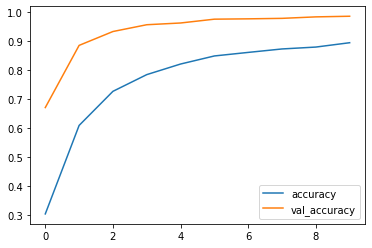

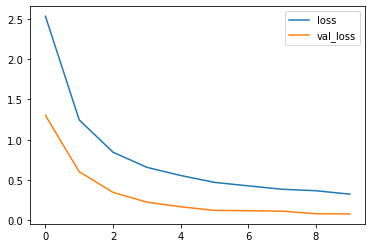

In [25]:
# now, we will fit the model and obseve how our is getting trained on each epoch,
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [26]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [27]:
# defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
  images = []
  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)


  # converting images into numpy array
  images = np.array(images)

  # the pixel value of each image ranges between 0 and 255
  # dividing each image by 255 will scale the values between 0 and 1.
  # this is also known as normalization.
  images = images/255
  return images


In [28]:
test_images = scaling(sorted(os.listdir(test_path)), test_path)

In [30]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [33]:
y_pred = np.argmax(model.predict(test_images),axis=1)
y_pred

395/395 [==============================] - 1s 3ms/step


array([16,  1, 38, ..., 32,  7, 10])

In [34]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

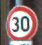

In [35]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [36]:
# original label 
print("Original label: ", all_lables[y_test[1]])

Original label:  Speed limit (30km/h)


In [37]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)
